In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv("sample_submission.csv")

In [4]:
# 어떤 자료인지 보자
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train = train_data.drop('label',axis = 1).values
y_train = train_data['label'].values

X_test = test_data.iloc[:,1:].values

In [10]:
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (18000, 784))

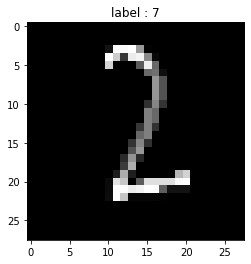

In [7]:
# 하나 출력해볼까!

index = 0
image = X_train[index].reshape(28,28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [4]:
# 전체 784 pixel, 즉, 28*28 사이즈의 그림들임!

image_size = X_train.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


In [11]:
# scaling

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

print('maximum value after scaling:', X_train.max(),
      '\nminimum value after scaling:' ,X_train.min())

maximum value after scaling: 1.0 
minimum value after scaling: 0.0


In [12]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


## tensorflow keras model

In [11]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2), 
    # dropout 대신 keras.layers.BatchNormalization() 이용 가능
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)
model.evaluate(X_val, y_val)

Train on 33600 samples
Epoch 1/5
33600/33600 [==============================] - 5s 153us/sample - loss: 0.2089 - accuracy: 0.9388 - loss: 0.2103 - accuracy: 0.
Epoch 2/5
33600/33600 [==============================] - 5s 135us/sample - loss: 0.0732 - accuracy: 0.9774
Epoch 3/5
33600/33600 [==============================] - 5s 139us/sample - loss: 0.0489 - accuracy: 0.9851
Epoch 4/5
33600/33600 [==============================] - 5s 136us/sample - loss: 0.0339 - accuracy: 0.9900 - loss: 0.026 - ETA: 0s - loss: 0.0334 - ac
Epoch 5/5
33600/33600 [==============================] - 4s 132us/sample - loss: 0.0240 - accuracy: 0.9923
8400/1 [========================================================================================================================================================================================================================================================================================================================================================================

[0.06499215824230174, 0.9840476]

In [12]:
predictions = model.predict_classes(X_test)

In [13]:
sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [14]:
sample_submission.to_csv("submission.csv",index=False)

원래 예시 코드로, 드롭아웃을 사용했다. 0.98488의 정확도를 보였다. 

###  kernel_initializer, BatchNormalization 사용

In [18]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(512, input_shape = (784, ), kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.Dense(512, kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.Dense(10, activation = 'softmax',kernel_initializer='he_normal'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=100)
model2.evaluate(X_val, y_val)

Train on 33600 samples
Epoch 1/10
33600/33600 [==============================] - 5s 163us/sample - loss: 0.1444 - accuracy: 0.9564
Epoch 2/10
33600/33600 [==============================] - 6s 173us/sample - loss: 0.0375 - accuracy: 0.9890
Epoch 3/10
33600/33600 [==============================] - 5s 149us/sample - loss: 0.0220 - accuracy: 0.9935
Epoch 4/10
33600/33600 [==============================] - 5s 144us/sample - loss: 0.0141 - accuracy: 0.9959 - loss: 0.0141 - accuracy: 0.99
Epoch 5/10
33600/33600 [==============================] - 5s 153us/sample - loss: 0.0129 - accuracy: 0.9963
Epoch 6/10
33600/33600 [==============================] - 5s 153us/sample - loss: 0.0114 - accuracy: 0.9964
Epoch 7/10
33600/33600 [==============================] - 5s 145us/sample - loss: 0.0082 - accuracy: 0.9976
Epoch 8/10
33600/33600 [==============================] - 5s 154us/sample - loss: 0.0061 - accuracy: 0.9979
Epoch 9/10
33600/33600 [==============================] - 5s 143us/sample - loss:

[0.08184600798952271, 0.98071426]

In [19]:
sample_submission2 = pd.read_csv("sample_submission.csv")
predictions2 = model2.predict_classes(X_test)

sample_submission2['Category'] = pd.Series(predictions2)

sample_submission2.to_csv("submission2.csv",index=False)

kernel initializer, batch normalization을 사용했지만 0.98338의 정확도를 보이며 오히려 정확도가 떨어졌다. 

layer개수를 늘린 결과를 본 후


전이학습을 해보겠다.

In [22]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(512, input_shape = (784, ), kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation('relu'))
model3.add(keras.layers.Dense(512, kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation('relu'))
model3.add(keras.layers.Dense(512, kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation('relu'))
model3.add(keras.layers.Dense(10, activation = 'softmax',kernel_initializer='he_normal'))

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=12, batch_size=64)
model3.evaluate(X_val, y_val)

Train on 33600 samples
Epoch 1/12
33600/33600 [==============================] - 11s 318us/sample - loss: 0.1369 - accuracy: 0.9581
Epoch 2/12
33600/33600 [==============================] - 9s 275us/sample - loss: 0.0495 - accuracy: 0.9845 - loss: 0.0498 - accuracy: 
Epoch 3/12
33600/33600 [==============================] - 9s 277us/sample - loss: 0.0350 - accuracy: 0.9890
Epoch 4/12
33600/33600 [==============================] - 9s 271us/sample - loss: 0.0284 - accuracy: 0.9907
Epoch 5/12
33600/33600 [==============================] - 9s 277us/sample - loss: 0.0241 - accuracy: 0.9924 - loss: 0.0228 - 
Epoch 6/12
33600/33600 [==============================] - 10s 286us/sample - loss: 0.0209 - accuracy: 0.9927- los
Epoch 7/12
33600/33600 [==============================] - 10s 283us/sample - loss: 0.0207 - accuracy: 0.9930
Epoch 8/12
33600/33600 [==============================] - 10s 311us/sample - loss: 0.0157 - accuracy: 0.9942
Epoch 9/12
33600/33600 [==============================] - 

[0.06901132196175847, 0.98535717]

In [24]:
sample_submission3 = pd.read_csv("sample_submission.csv")
predictions3 = model3.predict_classes(X_test)

sample_submission3['Category'] = pd.Series(predictions3)

sample_submission3.to_csv("submission3.csv",index=False)

0.98555의 정확도를 보였다. 지금까지중에 가장 높은 정확도이다.

레이어를 하나 더 추가하고 에폭을 더 늘리면 과적합되지 않으면서 어느정도까지 성능이 올라갈 수 있을 지 한번 보겠다.

In [25]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(512, input_shape = (784, ), kernel_initializer='he_normal'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation('relu'))
model4.add(keras.layers.Dense(512, kernel_initializer='he_normal'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation('relu'))
model4.add(keras.layers.Dense(512, kernel_initializer='he_normal'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation('relu'))
model4.add(keras.layers.Dense(512, kernel_initializer='he_normal'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation('relu'))
model4.add(keras.layers.Dense(10, activation = 'softmax',kernel_initializer='he_normal'))

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=15, batch_size=64)
model4.evaluate(X_val, y_val)

Train on 33600 samples
Epoch 1/15
33600/33600 [==============================] - 15s 433us/sample - loss: 0.1438 - accuracy: 0.9548
Epoch 2/15
33600/33600 [==============================] - 13s 378us/sample - loss: 0.0559 - accuracy: 0.9823
Epoch 3/15
33600/33600 [==============================] - 12s 344us/sample - loss: 0.0462 - accuracy: 0.9856
Epoch 4/15
33600/33600 [==============================] - 12s 345us/sample - loss: 0.0336 - accuracy: 0.9897
Epoch 5/15
33600/33600 [==============================] - 12s 358us/sample - loss: 0.0301 - accuracy: 0.9895
Epoch 6/15
33600/33600 [==============================] - 14s 402us/sample - loss: 0.0235 - accuracy: 0.9922
Epoch 7/15
33600/33600 [==============================] - 15s 440us/sample - loss: 0.0226 - accuracy: 0.9927
Epoch 8/15
33600/33600 [==============================] - 13s 394us/sample - loss: 0.0207 - accuracy: 0.9938
Epoch 9/15
33600/33600 [==============================] - 14s 423us/sample - loss: 0.0238 - accuracy: 0.9

[0.06928042111915558, 0.985]

In [27]:
sample_submission4 = pd.read_csv("sample_submission.csv")
predictions4 = model4.predict_classes(X_test)

sample_submission4['Category'] = pd.Series(predictions4)

sample_submission4.to_csv("submission4.csv",index=False)

0.98583의 정확도를 보였다. 전보다 조금 향상된 수치이다. 이미지 분류에 적합한 CNN을 이용해본 후, 전이학습을 해보도록 하겠다.

In [28]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, BatchNormalization, Activation, Flatten, Dropout
from keras import Sequential

In [19]:
print(X_train.shape, y_train.shape, X_test.shape)

(33600, 784) (33600,) (18000, 784)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, -1)

In [22]:
X_train.shape

(33600, 28, 28, 1)

In [52]:
model = Sequential()
model.add(Conv2D(input_shape = (28, 28, 1), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# prior layer should be flattend to be connected to dense layers
model.add(Flatten())
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_37 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
activation_37 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_38 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
activation_38 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 50)      

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, -1)

In [56]:
X_train.shape

(33600, 28, 28, 1)

In [ ]:
model.fit(X_train, y_train, epochs=15, batch_size=64)

In [61]:
sample_submission5 = pd.read_csv("sample_submission.csv")
predictions5 = model.predict_classes(X_test)

sample_submission5['Category'] = pd.Series(predictions5)

sample_submission5.to_csv("submission5.csv",index=False)

CNN, batchnormalization, kernel initializer를 사용시의 정확도는 0.99088로, 0.99의 벽을 넘을 수 있었다. 

이제부터는 전이 학습을 해보도록 하겠다.